In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from perceptron import Perceptron

In [3]:
df = pd.read_csv("csc_files\Surgical-deepnet.csv")
df

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1


In [4]:
df.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [5]:
X = df.drop("complication", axis=1).copy().values
Y = df["complication"].copy().values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((11708, 24), (2927, 24), (11708,), (2927,))

In [7]:
activation_functions = ["sigmoid", "tanh", "relu", "linear"]
epochs = 40

In [8]:
for activation in activation_functions:
    model = Perceptron(learning_rate=0.001, input_length=X_train.shape[1])
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    
    for epoch in range(epochs):
        model.fit(X_train, Y_train, epochs=1)
        train_loss = model.calculate_loss(X_train, Y_train, "mse")
        train_accuracy = model.calculate_accuracy(X_train, Y_train)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        test_loss = model.calculate_loss(X_test, Y_test, "mse")
        test_accuracy = model.calculate_accuracy(X_test, Y_test)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

100%|██████████| 1/1 [00:00<00:00, 13.39it/s]


In [9]:
model.evaluate(X_test, Y_test)

(np.float64(0.2638374973716379), np.float64(0.7557225828493338))

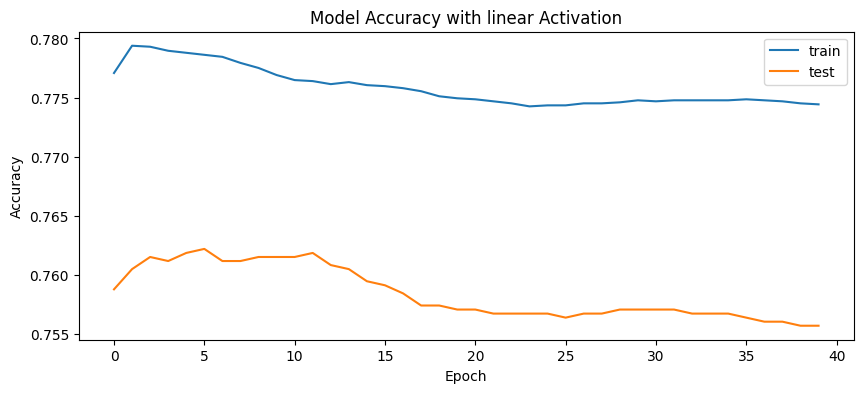

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(range(epochs), train_accuracies, label="train")
plt.plot(range(epochs), test_accuracies, label="test")
plt.title(f"Model Accuracy with {activation} Activation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

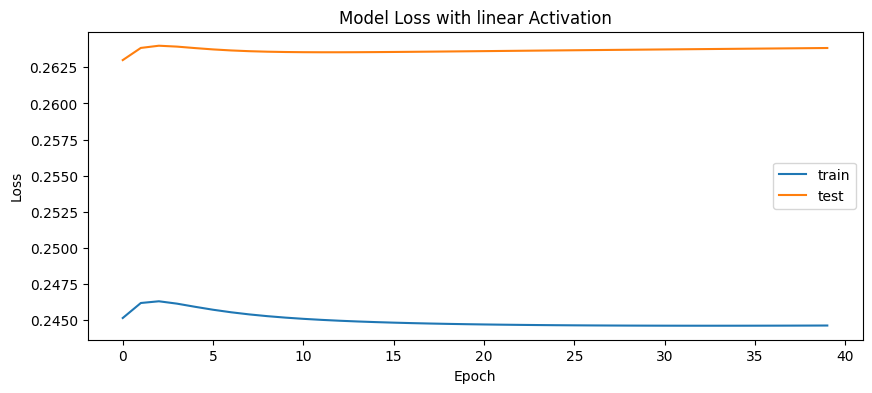

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(range(epochs), train_losses, label="train")
plt.plot(range(epochs), test_losses, label="test")
plt.title(f"Model Loss with {activation} Activation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred > 0.5, 1, 0)
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix with", activation, "Activation:")
print(cm)

Confusion Matrix with linear Activation:
[[2120   19]
 [ 696   92]]


In [13]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score is:", precision_score(Y_test, Y_pred))
print("Recall Score is:", recall_score(Y_test, Y_pred))

Precision Score is: 0.8288288288288288
Recall Score is: 0.116751269035533


In [16]:
F1 = (2 * precision_score(Y_test, Y_pred) * recall_score(Y_test, Y_pred)) / (precision_score(Y_test, Y_pred) + recall_score(Y_test, Y_pred))
print("F1 Score is:", F1)


F1 Score is: 0.20467185761957732
